# Clase 3 - Gráficos con MatPlotLib y Seaborn

Bienvenidos a la tercera clase de introducción y transición a `Python` donde revisaremos una librería muy utilizada para hacer gráficos `pyplot` dentro de `MatPlotLib`, y `seaborn` que son gráficos tipo ggplot de `R`. En esta sección revisaremos lo siguientes conceptos:

 - Importación del modulo e introducción
 - Gráficos de barras, histogramas y variantes
 - Gráficos de dispersión (scatterplot) y variantes
 - Boxplot


Para leer los datos desde la nube instalamos la librería gcsfs.

In [ ]:
#!pip install gcsfs

## Importación del modulo e introducción

En esta sección importaremos el modulo que utilizaremos durante la clase e introduciremos los conceptos básicos para poder empezar a crear nuestros gráficos.

In [ ]:
# Importar el modulo pyplot y llamarlo plt  y seaborn como sns (convención) 
import matplotlib.pyplot as plt
import seaborn as sns

Lo primero que debemos generar es una `figura` que será el gráfico y los `ejes` que tendrán los datos asociados al gráfico, lo cual se realiza de la siguiente forma

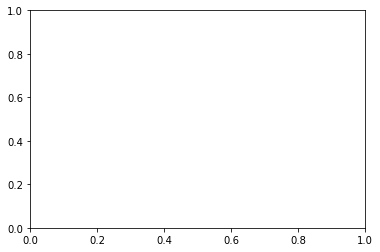

In [ ]:
fig, ax = plt.subplots()
plt.show()

Lo anterior crea una figura vacia a la cual debemos llenar con la información que nos interesa graficar. Para ello utilizaremos un dataset sobre los precios del S&P future. 

In [ ]:
import pandas as pd
import numpy as np
Stocks = pd.read_csv('SPfuture.csv',index_col = 'Date', parse_dates = True)

display(Stocks.tail())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-05,3300.75,3323.25,3292.00,3316.00,3316.00,1116787.0
2020-08-06,3317.00,3345.50,3300.50,3344.25,3344.25,1346665.0
2020-08-07,3343.75,3347.75,3322.25,3344.75,3344.75,1346665.0
2020-08-09,3347.00,3347.00,3335.00,3341.50,3341.50,1926926.0
2020-08-10,3349.75,3357.25,3329.00,3352.50,3352.50,381207667.0


Luego, graficaremos los precios de cierre de la siguiente forma

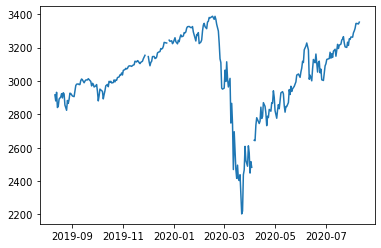

In [ ]:
fig, ax = plt.subplots()
ax.plot(Stocks.index,Stocks['Close'])
plt.show()

Y ya tenemos nuestro primer gráfico! 

Para realizar lo mismo con seaborn, basta especificar un tipo de grafico, en este caso lineas:

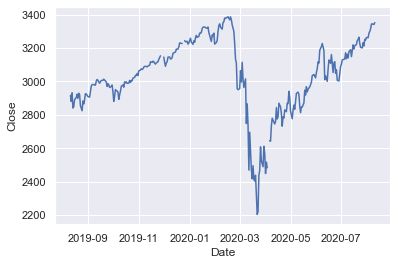

In [ ]:
sns.set_theme(style="darkgrid") #nos permite el color de fondo

sns.lineplot(x="Date", y="Close", data=Stocks);

Ahora la idea es ir complicando el tipo de gráfico que queremos pero antes revisaremos algunos comandos básicos que nos serviran más adelante

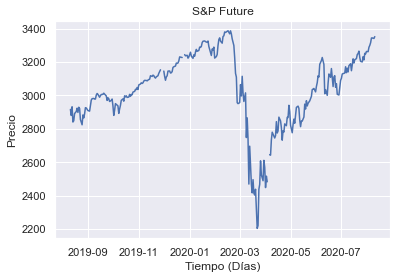

In [ ]:
# Nombre de los ejes y titulo
fig, ax = plt.subplots()
ax.plot(Stocks.index,Stocks['Close'])
ax.set_xlabel('Tiempo (Días)')
ax.set_ylabel('Precio')
ax.set_title('S&P Future')
plt.show()

Las mismas funciones son aplicables a un gráfico de seaborn

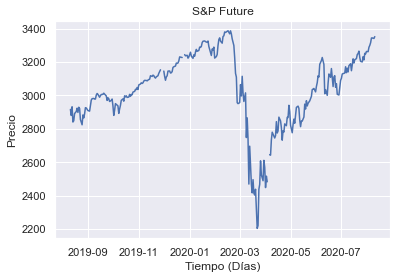

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(x="Date", y="Close", data=Stocks)
ax.set_xlabel('Tiempo (Días)')
ax.set_ylabel('Precio')
ax.set_title('S&P Future')
plt.show()

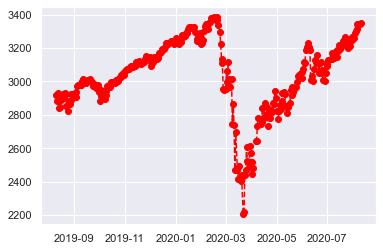

In [ ]:
# Algunos parámetro del método plot
fig, ax = plt.subplots()
ax.plot(Stocks.index,Stocks['Close'], marker = 'o', linestyle = '--', color = 'red')
plt.show()

Supongamos que ahora queremos poner en perspetiva dos series, digamos el precio de cierre y el volumen transado. Si graficamos obtenemos lo siguiente

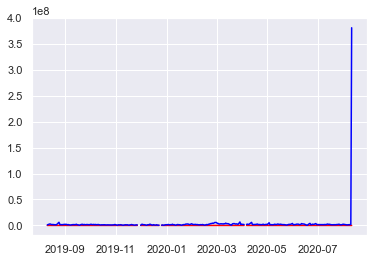

In [ ]:
fig, ax = plt.subplots()
ax.plot(Stocks.index,Stocks['Close'], color = 'red')
ax.plot(Stocks.index,Stocks['Volume'], color = 'blue')
plt.show()

Claramente el gráfico anterior no ayuda a comprender ningún tipo de relación que puedan tener estas dos variables dado que al tener una escala de valores tan distinta, una parece una linea constante en 0, para ello tenemos dos alternativas:

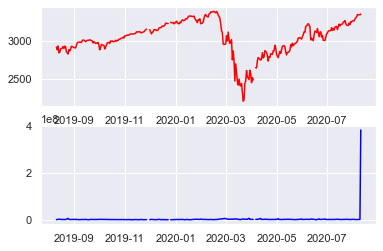

In [ ]:
# Generar dos gráficos
fig, ax = plt.subplots(2,1)
ax[0].plot(Stocks.index,Stocks['Close'], color = 'red')
ax[1].plot(Stocks.index,Stocks['Volume'], color = 'blue')
plt.show()

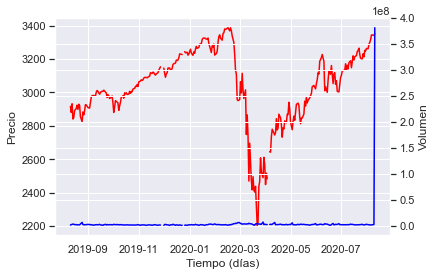

In [ ]:
# Ambos gráficos  en la misma ventana, pero con escala propia
fig, ax = plt.subplots()
ax.plot(Stocks.index,Stocks['Close'], color = 'red')
ax.set_xlabel('Tiempo (días)')
ax.set_ylabel('Precio')
ax2 = ax.twinx()
ax2.plot(Stocks.index,Stocks['Volume'], color = 'blue')
ax2.set_ylabel('Volumen')
plt.show()

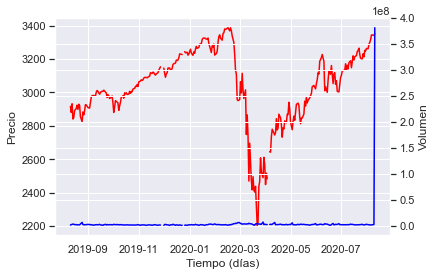

In [ ]:
# Lo cual es lo mismo con seaborn
fig, ax = plt.subplots()
sns.lineplot(x="Date", y="Close", data=Stocks, color = 'red')
ax.set_xlabel('Tiempo (días)')
ax.set_ylabel('Precio')
ax2 = ax.twinx()
sns.lineplot(x="Date", y="Volume", data=Stocks, color = 'blue')
ax2.set_ylabel('Volumen')
plt.show()

## Gráficos de barras, histogramas y variantes

Ahora que ya hemos jugado un poco con gráficos, entraremos a ver algunos gráficos super utilizados en data science y estadística como lo son los gráficos de barra e histogramas. Para ilustrar estos gráficos volveremos a los datos antes utilizados sobre animes

In [ ]:
Animes = pd.read_csv('anime.csv',delimiter = ';')
Animes.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


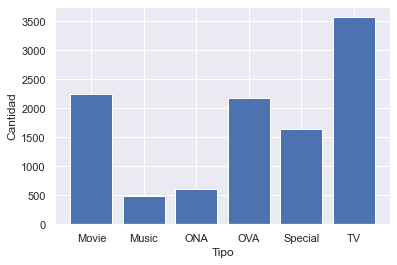

In [ ]:
fig, ax = plt.subplots()
Animes_bar = Animes.groupby('type').agg('count')['episodes']
ax.bar(Animes_bar.index, Animes_bar)
ax.set_xlabel('Tipo')
ax.set_ylabel('Cantidad')
plt.show()

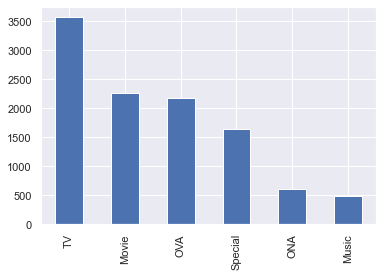

In [ ]:
#podemos graficar lo mismo directamente a través de la función .plot de pandas
Animes.type.value_counts().plot(kind='bar');

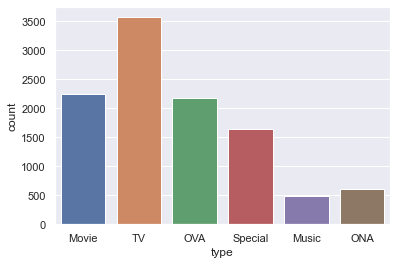

In [ ]:
#O aún más fácil, con seaborn
sns.countplot(x='type', data=Animes);

Ya tenemos nuestro gráfico de barras. Ahora si tenemos una variable de la cual estamos en conocer su distribución, entonces necesitaremos hacer un histograma. Utilizando los mismos datos ilustraremos como se realiza

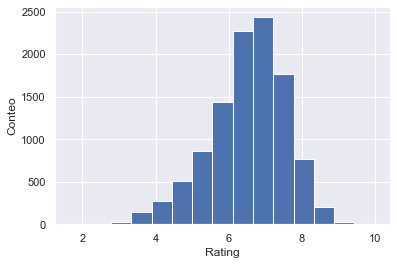

In [ ]:
fig, ax = plt.subplots()
ax.hist(Animes['rating'], bins = 15) #density, cumulative
ax.set_xlabel('Rating')
ax.set_ylabel('Conteo')
plt.show()

Algo interesante de Seaborn es que nos permite ver el suavizado de la función de distribución de manera rápida

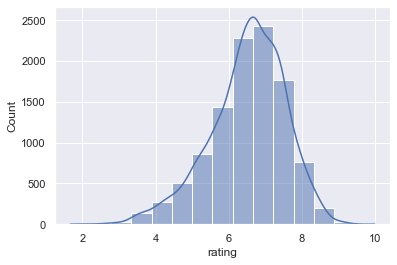

In [ ]:
sns.histplot(data=Animes, x="rating", bins = 15, kde=True);

Supongamos que tenemos otra variable que correponde a otro estilo de ranking (la cual crearemos a continuación) y queremos comprar sus distribuciones, entonces lo hacemos de la siguiente manera

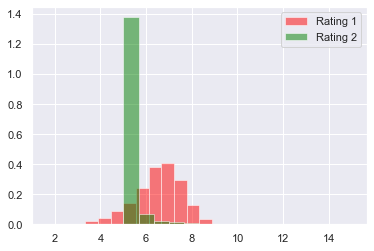

In [ ]:
Animes['rating2'] = Animes['members']*10/Animes['members'].max()+5
fig, ax = plt.subplots()
ax.hist(Animes['rating'],bins = 15, density = True, color = 'red',alpha = 0.5, label = 'Rating 1')
ax.hist(Animes['rating2'], bins = 15, density = True, color = 'green', alpha = 0.5, label = 'Rating 2')
ax.legend(loc = 'upper right')
plt.show()

Por otro lado, con seaborn podemos ver rápidamente un histograma para cada rating, desagregado por variables categóricas, como lo es type

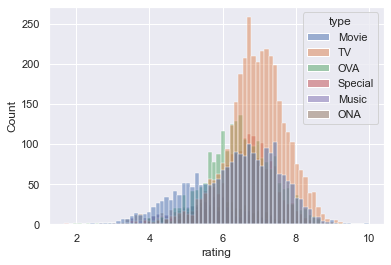

In [ ]:
sns.histplot(data=Animes, x="rating", hue="type");

Finalmente, el último gráfico de barras que revisaremos es uno conocido como stacked bar, que es útil para graficar las proporciones de ciertos atributos o caracteristicas para grupos de variables. Por ejemplo, crearemos un dataset que consiste en cantidad de niños, adolecentes, adultos y ancianos en cuatro países de latinoamerica Chile, Argentina, Ecuador y Colombia. Los datos son los siguientes:

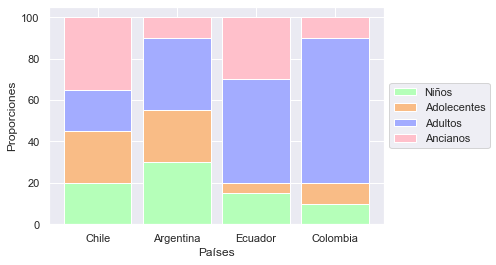

In [ ]:
# Data
r = [0,1,2,3]
raw_data = {'Niños': [20, 30, 15, 10], 
            'Adolecentes': [25, 25, 5, 10],
            'Adultos': [20, 35, 50, 70],
            'Ancianos': [35, 10, 30, 10]}
names = ['Chile','Argentina','Ecuador','Colombia']
df = pd.DataFrame(raw_data, index=names)

fig, ax = plt.subplots()
ax.bar(df.index, df['Niños'], label='Niños', color='#b5ffb9', edgecolor='white', width=0.85)
ax.bar(df.index, df['Adolecentes'], bottom=df['Niños'], color='#f9bc86', label='Adolecentes', edgecolor='white', width=0.85)
ax.bar(df.index, df['Adultos'], bottom=df['Niños'] + df['Adolecentes'], color='#a3acff', edgecolor='white', width=0.85, label='Adultos')
ax.bar(df.index, df['Ancianos'], bottom=df['Niños'] + df['Adolecentes'] + df['Adultos'], color='pink', edgecolor='white', width=0.85, label='Ancianos')
ax.set_xlabel('Países')
ax.set_ylabel('Proporciones')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Sin tanto control pero más rápido:

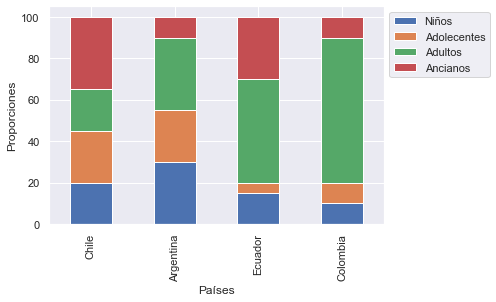

In [ ]:
ax = df.reset_index().plot(x='index', kind='bar', stacked=True)
ax.set_xlabel("Países")
ax.set_ylabel("Proporciones")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

## Gráficos de dispersión

Los gráficos de dispersión o scatterplot son muy útiles para descubrir relaciones entre variables o si estas presentan algún tipo de agrupamiento, entre otros. A continuación ilustraremos como construir dicho gráfico y algunas variantes. Partiremos utilizando los datos de Anime

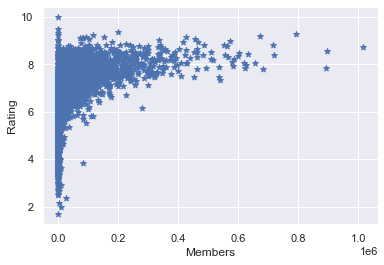

In [ ]:
fig, ax = plt.subplots()
# Primero graficaremos el rating versus la cantidad de miembros
ax.scatter(Animes['members'],Animes['rating'], marker = '*')
ax.set_xlabel('Members')
ax.set_ylabel('Rating')
plt.show()

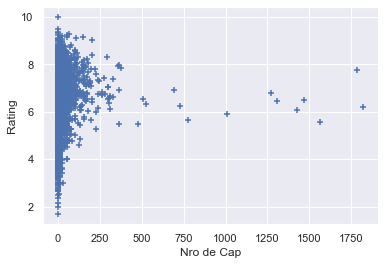

In [ ]:
# Ahora rating versus cantidad de capítulos
fig, ax = plt.subplots()
ax.scatter(Animes['episodes'],Animes['rating'],marker = '+')
ax.set_xlabel('Nro de Cap')
ax.set_ylabel('Rating')
plt.show()

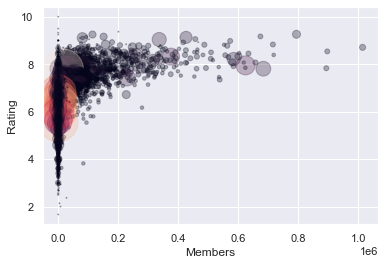

In [ ]:
# Ahora podemos hacer algo un poco más sofisticado, haciendo un gráfico rating vs miembros, donde el tamaño
# del punto sea dado por episodes
fig, ax = plt.subplots()
ax.scatter(Animes['members'],Animes['rating'],c = Animes['episodes'], s = Animes['episodes'], alpha = 0.3)
ax.set_xlabel('Members')
ax.set_ylabel('Rating')
plt.show()

Al igual que antes, seaborn es similar, pero permite desagregar las imagenes por categoría de manera rápida

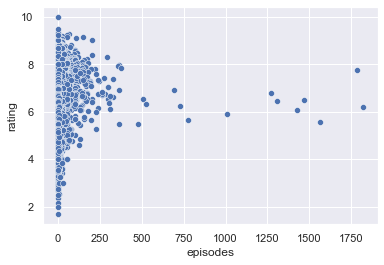

In [ ]:
sns.scatterplot(data=Animes, x="episodes", y="rating");

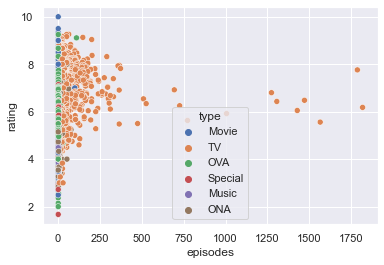

In [ ]:
sns.scatterplot(data=Animes, x="episodes", y="rating", hue="type");

Así, podemos observar rápidamente, que son los programas de TV los que tienen más episodios, independiente del rating. Lo cual nos permite evadir el caer en un error de correlación 

## Boxplot

El diagrama de caja o boxplot es un gráfico muy utilizado con distintos propositos, dado que el muestra de manera gráfica y utilizando indicadores de posición, la distribución y dispersión de una variable. A continuación mostraremos como graficar un boxplot así como también algunas variantes cuando son varias variables.

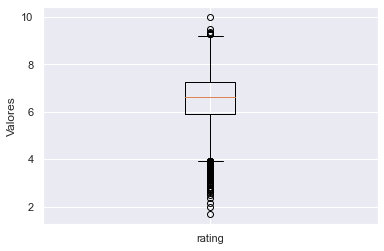

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(Animes['rating'], labels = ['rating']) # showfliers = False, vert = False
ax.set_ylabel('Valores')
plt.show()

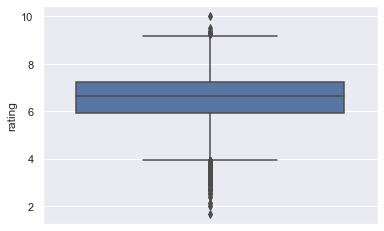

In [ ]:
sns.boxplot(y="rating", data=Animes);

Con seaborn podemos rápidamente ver 2 dimensiones:

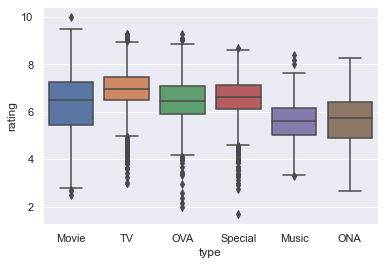

In [ ]:
sns.boxplot(x="type", y="rating", data=Animes);

Si agregamos una categoría extra como que tan largo son los animés, podremos ver incluso una tercera dimensión

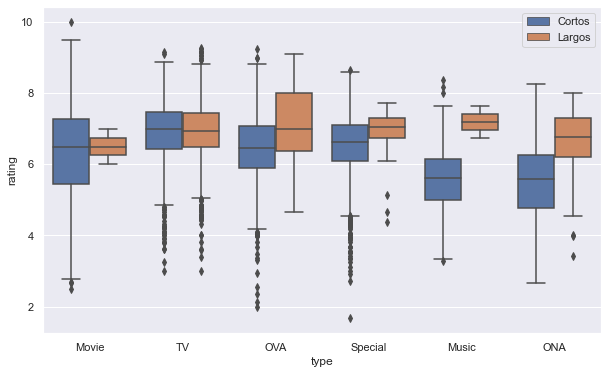

In [ ]:
Animes['duracion'] = np.where(Animes.episodes>np.mean(Animes.episodes),'Largos','Cortos')

# Esto es para el tamaño#
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
#########################

sns.boxplot(x="type", y="rating", hue='duracion', data=Animes);
plt.legend(bbox_to_anchor=(1.0, 1.0))

In [ ]:
# Ejercicios

En el siguiente link encontrará los datos del Minsal con los Casos de Covid acumulados diarios por región en Chile:


https://github.com/MinCiencia/Datos-COVID19/raw/master/output/producto3/CasosTotalesCumulativo_T.csv


a) Cargue los datos en Python utilizando la función read_csv de pandas. ¿Qué estructura particular tiene esta base de datos?

b) Muestre en un gráfico de barras la distribución del Total de Casos Covid en las Regiones Metropolitana, Maule, Coquimbo, Valparaíso, Los Lagos y Biobío. (Recuerde que en la base de datos se encuentran los casos acumulados, por ende, basta tomar la última fila como casos totales. Además, la función .melt le puede ayudar a tranformar las regiones de columnas a filas, usando totales.melt(var_name="Region", value_name="Totales").

c) Realice un gráfico de los Casos diarios de la Región Metropolitana, para esto, siga los siguientes pasos:

- c.1) Obtenga los Casos Diarios para la Región Metropolitana, para esto, puede utilizar la función .diff() el cual obtiene los casos diarios restando los casos acumulados. Defina una variable llamada diarios_region que corresponda a los casos diarios de la Región Metropolitaana.

- c.2) La variable Region corresponde a la fecha. Sin embargo, es necesario definirla para que se reconozca como fecha. Para esto utilice la funcion pd.to_datetime(,  format = '%Y-%m-%d') para crear una nueva variable date.

- c.3) Cree el gráfico utilizando la variable date en el eje x y la variable diarios_region en el eje y.

- c.4) Añada la media móvil a 14 días de los casos diarios en el gráfico. Para obtener la media móvil cree una variable media_movil con la función rolling(14).mean() sobre la variable de los casos diarios, y luego con la función  sns.lineplot() añada al gráfico esta media móvil. 

- c.5) Cree una variable auxiliar llamada ultimosXDias y predefinala como 90 de modo que el gráfico dependa de esta variable y muestre solo los últimos 90 días. Para esto, importe la librería datetime de modo de que puede filtrar que la fecha de la base de datos sea mayor que datetime.datetime.now() - pd.to_timedelta(days=ultimosXDias) y luego realizar el gráfico a la base de datos filtrada.

- c.6) Desafío: Cree una función que reciba como argumentos la región y el número de días, de modo de mostrar los casos diarios en los últimos n días para la región de interés. 